In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [8]:
train

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,1,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,59997,8,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,59998,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
set(train['label']) # 총 10개의 옷 분류

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0


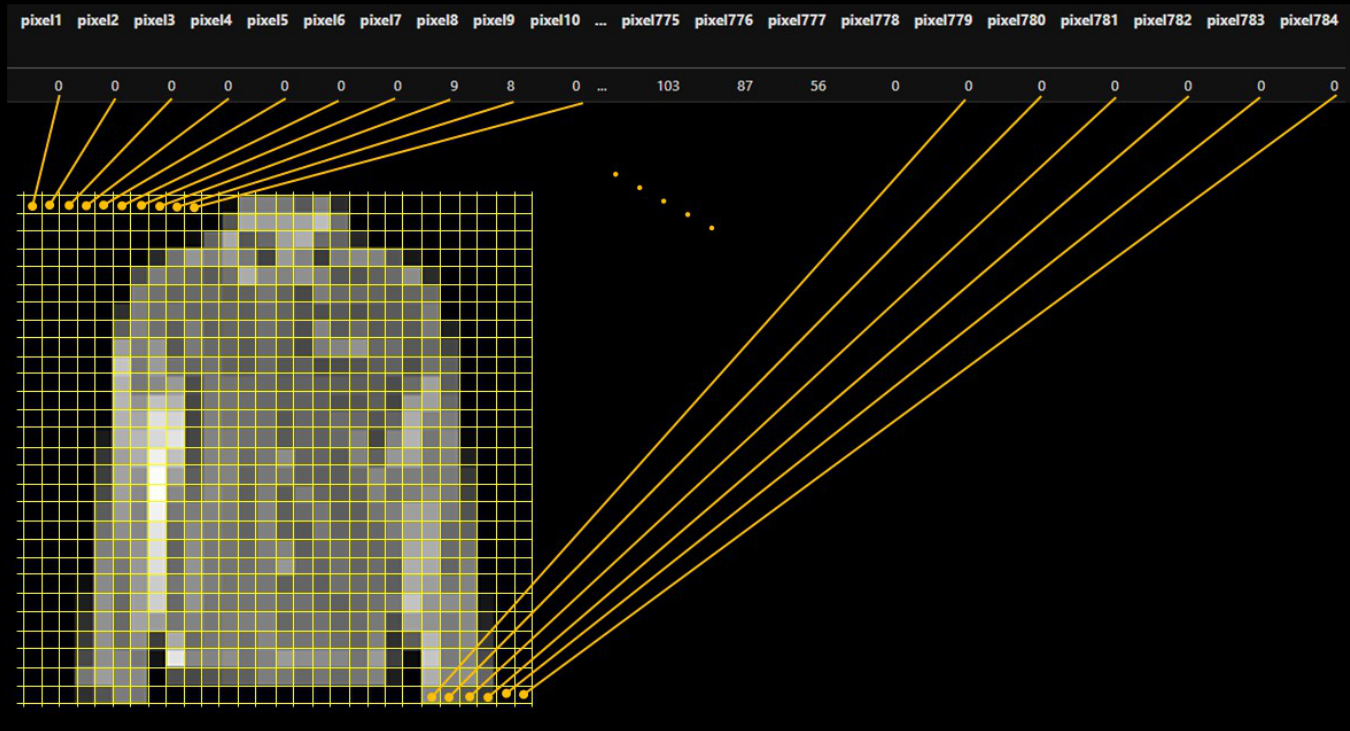

## 데이터 시각화

In [48]:
img=train[train['label']==0].iloc[0,:] # 라벨이 i인 것 중 첫번째 이미지
img

index       3
label       0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel780    1
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 3, Length: 786, dtype: int64

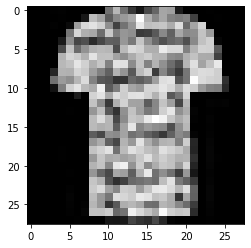

In [55]:
img=train[train['label']==0].iloc[0,:] # 라벨이 i인 것 중 첫번째 이미지
img=img.drop(['label','index'])
img.shape#28x 28이미지 확인
img = np.array(img,dtype='float32')#pandas 객체를 numpy 객체로. 픽셀이 0~255로 이뤄졌기에 float 자료형
plt.imshow(img.reshape(28,28),cmap='gray')# 1채널 짜리 이미지이므로, gray color map 

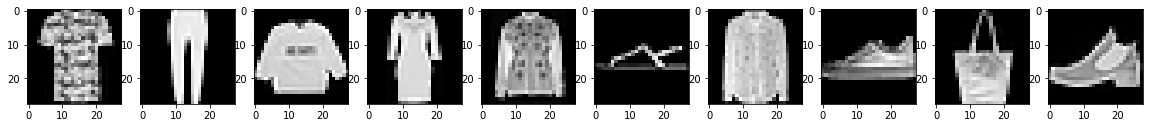

In [63]:
plt.figure(figsize=(20,50))
for i in range(10):
    img=train[train['label']==i].iloc[0,:] # 라벨이 i인 것 중 첫번째 이미지
    img=img.drop(['label','index'])
    img.shape#28x 28이미지 확인
    img = np.array(img,dtype='float32')#pandas 객체를 numpy 객체로. 픽셀이 0~1로 이뤄졌기에 float 자료형
    plt.subplot(1,10,i+1) # row, column ,index 순
    plt.imshow(img.reshape(28,28),cmap='gray')